<a href="https://colab.research.google.com/github/Koushik-SCC/Mathematical/blob/main/Numerical_Integration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Integration

###Trapezoidal Rule

In [26]:
#Trapezoidal Rule
def Trapz(f,a,b,n):
  h = (b-a)/n
  s = 0
  for i in range(1,n):
      s += 2*f(a+i*h)
      
  I = (h/2)*(f(a)+f(b)+s)
  return I

###Simpson's 1/3 Rule

In [27]:
#Simpson's 1/3 Rule
def Simps(f,a,b,n):
  h = (b-a)/n
  s1 = 0  #for storing the even term values. 0 is taken as the initial value
  for i in range(2,n-1,2):
      s1 += 2*f(a+i*h)
  s2 = 0  # #for storing the odd term values from 1 to n-1
  for i in range(1,n,2):
      s2 += 4*f(a+i*h)
  I = (h/3)*(f(a)+f(b)+s1+s2)
  return I

###16 points Gauss Quadrature

In [28]:
# 16 points Gauss Quadrature
# The 16 weights
w = [0.1894506104550685,0.1894506104550685,0.1826034150449236,0.1826034150449236,0.1691565193950025,0.1691565193950025,0.1495959888165767,0.1495959888165767,0.1246289712555339,0.1246289712555339,0.0951585116824928,0.0951585116824928,0.0622535239386479,0.0622535239386479,0.0271524594117541,0.0271524594117541]
# The abscissae
X = [-0.0950125098376374,0.0950125098376374,-0.2816035507792589,0.2816035507792589,-0.4580167776572274,0.4580167776572274,-0.6178762444026438,0.6178762444026438,-0.7554044083550030,0.7554044083550030,-0.8656312023878318,0.8656312023878318,-0.9445750230732326,0.9445750230732326,-0.9894009349916499,0.9894009349916499]
# The Integration
def GQ16(f,a,b):
  I = 0 # to store data for the integration
  for i in range(16):
      xi = ((b-a)/2)*X[i] + (b+a)/2
      I += w[i]*((b-a)/2)*f(xi)
  return I

In [29]:
import math as m
def K(x):                   # the integrand function (The Elliptic Integral)
    f = 1/m.sqrt(1-0.25*(m.sin(x))**2)
    return f
n = eval(input('Enter n: '))   # the number of equispaced points
a = 0      # the lower limit
b = m.pi/2 # the upper limit

Enter n: 30


In [30]:
print('Value of the Integartion by Trapezoidal Method = ',Trapz(K,a,b,n))
print("Value of the Integartion by Simpson's 1/3 Rule=" ,Simps(K,a,b,n))
print("Value of the Integartion by Gauss Quadrature=" ,GQ16(K,a,b))

Value of the Integartion by Trapezoidal Method =  1.6857503548125958
Value of the Integartion by Simpson's 1/3 Rule= 1.685750354812596
Value of the Integartion by Gauss Quadrature= 1.685750354812596


### Error Function

Value of erf(x) using GQ:  [-0.9999999845827492, -0.9999999423568557, -0.999999795357428, -0.9999993100743112, -0.999997790863646, -0.9999932807793572, -0.9999805839378259, -0.9999466876886117, -0.9998608747070807, -0.9996548590550082, -0.9991858364520917, -0.9981732454013578, -0.9961001391736328, -0.9920752255564353, -0.9846648629619924, -0.9717267611130166, -0.9503052461237154, -0.9166712415351521, -0.8665922009819134, -0.795881904282991, -0.7012017960788293, -0.5809796664656844, -0.43621592355168953, -0.2709112977017304, -0.09190838408959276, 0.09190838408959276, 0.27091129770172945, 0.4362159235516888, 0.5809796664656839, 0.7012017960788289, 0.7958819042829907, 0.8665922009819129, 0.9166712415351518, 0.9503052461237151, 0.9717267611130166, 0.9846648629619923, 0.9920752255564355, 0.9961001391736328, 0.9981732454013579, 0.9991858364520917, 0.9996548590550083, 0.9998608747070806, 0.9999466876886118, 0.9999805839378259, 0.9999932807793571, 0.9999977908636458, 0.9999993100743113, 0.9999

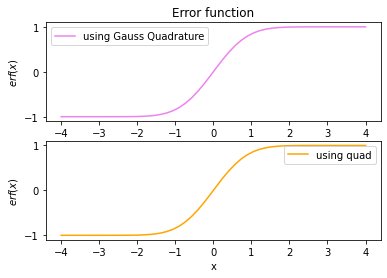

In [31]:
#the erf function by Gaussian Quadrature
import numpy as np
# the error function
def erf1(x):
  def m(t):
      return (2/np.sqrt(np.pi))*np.exp(-t**2)
  # The Integration
  I = GQ16(m,a,x)
  return I
a = 0
x = np.linspace(-4,4)
ERF1 = []
for i in x:
    ERF1.append(erf1(i))
print('Value of erf(x) using GQ: ',ERF1)
from scipy.integrate import quad
# using quad 
def erf2(x):
    def F(t):
        f = (2/(np.sqrt(np.pi)))*np.exp(-t**2)
        return f
    II,ee = quad(F,0,x)
    return II
ERF2 = []
for i in x:
    ERF2.append(erf2(i))
print('Value of erf(x) using quad: ',ERF2)

# the plot
import matplotlib.pyplot as plt
plt.subplot(211)
plt.plot(x,ERF1,'violet',label='using Gauss Quadrature')
plt.xlabel('x')
plt.ylabel('$erf(x)$')
plt.legend()
plt.title('Error function')
plt.subplot(212)
plt.plot(x,ERF2,'orange',label='using quad')
plt.xlabel('x')
plt.ylabel('$erf(x)$')
plt.legend()
plt.show()